<a href="https://colab.research.google.com/github/vinicunhac/fiap_big_data_science/blob/main/titanic_survivors_chalenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Libs

In [70]:
import pandas as pd
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import recall_score, precision_score, accuracy_score
import itertools
from sklearn.linear_model import LogisticRegression
import time
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading datasets

In [71]:
train = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/titanic/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/titanic/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train.shape

(891, 12)

In [73]:
test.shape

(418, 11)

In [74]:
datasets = [train, test]

## 2. Data Exploring

In [75]:
train['Died'] = 1 - train['Survived']

<AxesSubplot:xlabel='Sex'>

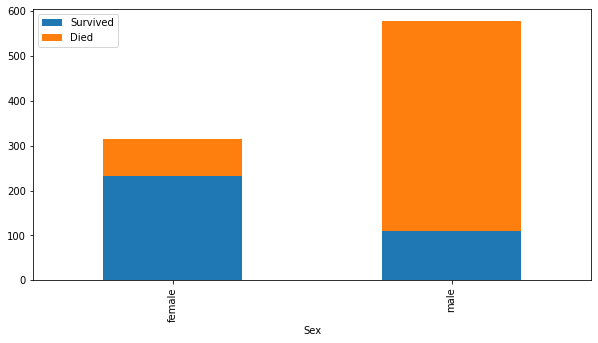

In [76]:
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='Pclass'>

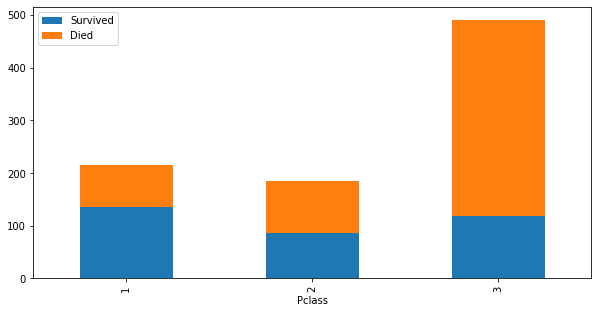

In [77]:
train.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='Embarked'>

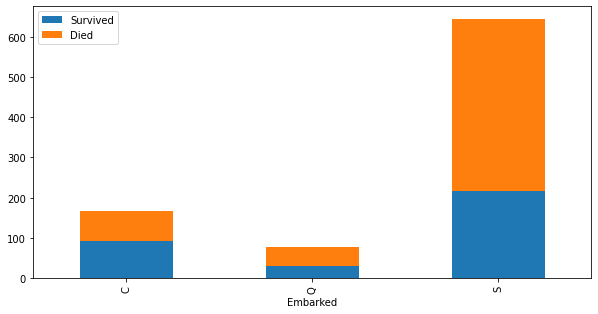

In [78]:
train.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='Parch'>

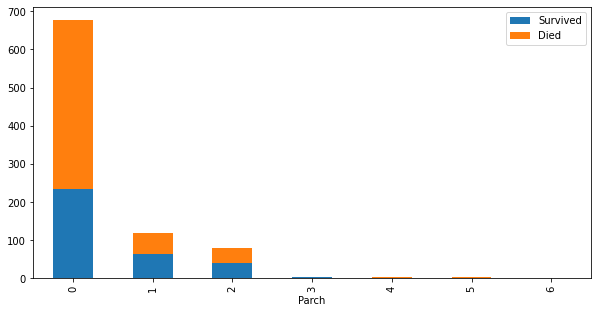

In [79]:
train.groupby('Parch').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='SibSp'>

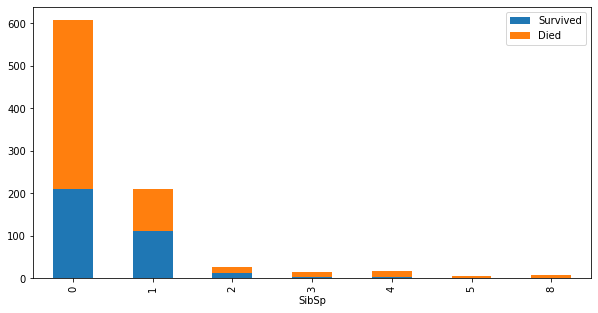

In [80]:
train.groupby('SibSp').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Died         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [82]:
for i in datasets:
  i['relatives'] = i['SibSp'] + i['Parch']
  i.loc[i['relatives'] > 0, 'traveled_alone'] ='No'
  i.loc[i['relatives'] == 0, 'traveled_alone'] ='Yes'

<AxesSubplot:xlabel='relatives'>

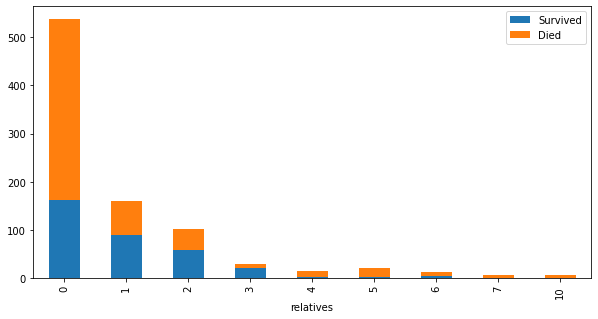

In [83]:
train.groupby('relatives').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True) 

<AxesSubplot:xlabel='traveled_alone'>

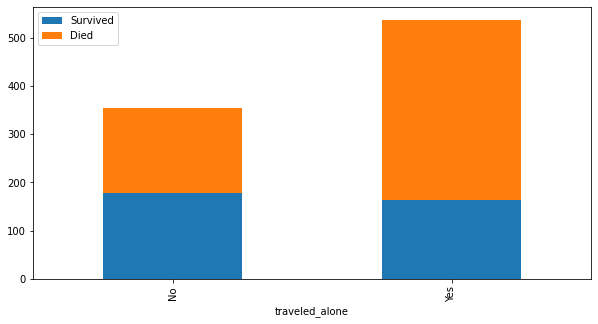

In [84]:
train.groupby('traveled_alone').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


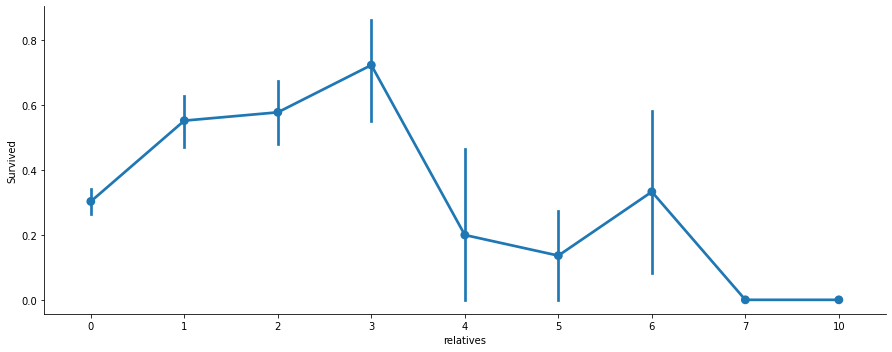

In [85]:
sns.factorplot('relatives', 'Survived', data=train, aspect = 2.5)

In [86]:
ranges_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]  
for i in datasets:
  i['group_by_age'] =  pd.cut(i["Age"], ranges_age)


<AxesSubplot:xlabel='group_by_age'>

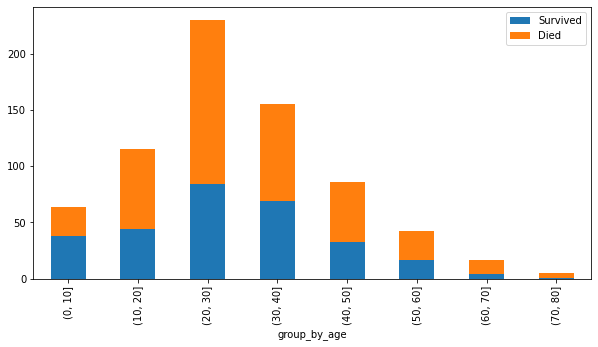

In [87]:
train.groupby('group_by_age').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


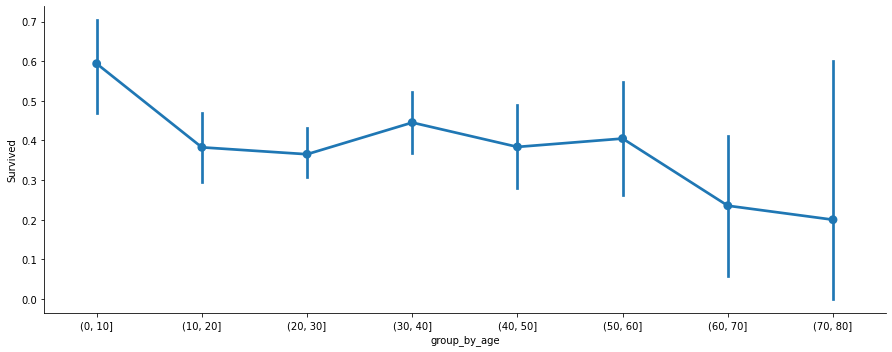

In [88]:
sns.factorplot('group_by_age', 'Survived', data=train, aspect = 2.5)

## The above analysis explains some factors about the survivors. Most survivors are the same characteristics.

1.   Women have a huge advantage over men.
2.   Those who were in first class have a better chance of surviving.
3.   Those who boarded at C survived longer than those who boarded elsewhere.
4.   Who traveled with 1, 2 or 3 relatives had a better chance of surviving.
5.   Children survived longer than other passengers.


## 3. Features Engineering

In [89]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Died                0
relatives           0
traveled_alone      0
group_by_age      177
dtype: int64

In [90]:
test.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                86
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin             327
Embarked            0
relatives           0
traveled_alone      0
group_by_age       86
dtype: int64

In [91]:
for i in datasets:
  i.drop(['Cabin', 'Name', 'Ticket'],axis=1,inplace=True)


In [92]:
for i in datasets:
  i['Age'] = i['Age'].fillna(29.7)
  i['group_by_age'] =  pd.cut(i["Age"], ranges_age)
  i.loc[train['Age'] <= 10, 'child'] = 1
  i['child'] = i['child'].fillna(0)
  i['Embarked'] = i['Embarked'].fillna('S')
  i['Fare'] = i['Fare'].fillna(32.2)

In [93]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Died              0
relatives         0
traveled_alone    0
group_by_age      0
child             0
dtype: int64

In [94]:
test.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
relatives         0
traveled_alone    0
group_by_age      0
child             0
dtype: int64

The Age, Embarked, and Fare variables have some null values. I made the corrections below.

1.   Age: the average of the dataset was applied
2.   Embarked: The value S was apllied because it was the value with more repetitions in this dataset
3.   Fare: the average of the dataset was applied



<AxesSubplot:>

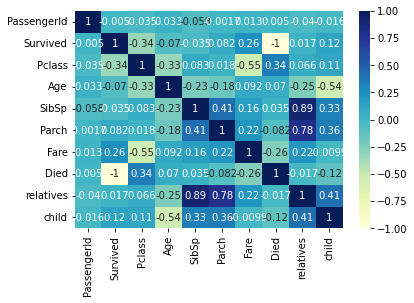

In [95]:
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

In [96]:
encode_col_list = list(train.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train = pd.concat([train,pd.get_dummies(train[i], prefix=i)],axis=1)
    train.drop(i, axis = 1, inplace=True)

In [97]:
encode_col_list = list(test.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    test = pd.concat([test,pd.get_dummies(test[i], prefix=i)],axis=1)
    test.drop(i, axis = 1, inplace=True)

In [98]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died,relatives,group_by_age,child,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,traveled_alone_No,traveled_alone_Yes
0,1,0,3,22.0,1,0,7.2500,1,1,"(20, 30]",0.0,0,1,0,0,1,1,0
1,2,1,1,38.0,1,0,71.2833,0,1,"(30, 40]",0.0,1,0,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,"(20, 30]",0.0,1,0,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,1,"(30, 40]",0.0,1,0,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,1,0,"(30, 40]",0.0,0,1,0,0,1,0,1


In [99]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives,group_by_age,child,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,traveled_alone_No,traveled_alone_Yes
0,892,3,34.5,0,0,7.8292,0,"(30, 40]",0.0,0,1,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,1,"(40, 50]",0.0,1,0,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,"(60, 70]",0.0,0,1,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,"(20, 30]",0.0,0,1,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,2,"(20, 30]",0.0,1,0,0,0,1,1,0


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


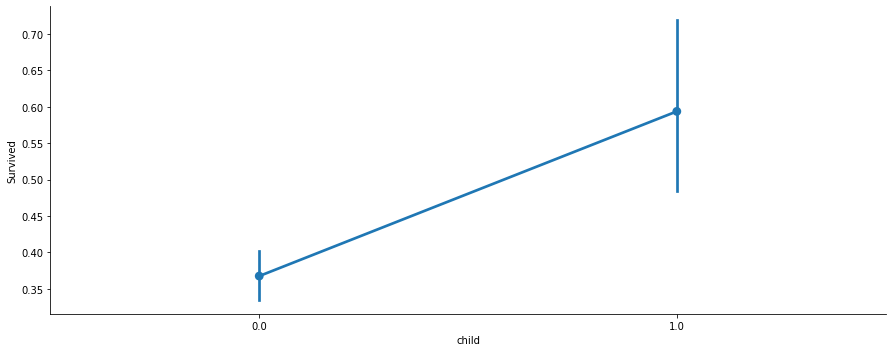

In [100]:
sns.factorplot('child', 'Survived', data=train, aspect = 2.5)

## 4. Bulding Model

próximos passos .. criar variaveis dictomicas para plass = 1, estava embarcado em C e analisar alguma coisa de Fare. Verificar também tratamento do nome das pessoas.

In [103]:
# melhor aproveitamento com essas variaveis.
features = ["Pclass",  "Sex_female", 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare',  'child']
mod = tree.DecisionTreeClassifier()

mod.fit(train[features], train['Survived'])

mod_predictions = mod.predict(test[features])

df_pred = test.loc[:,['PassengerId']]
df_pred['Survived'] = mod_predictions

from google.colab import files
df_pred.to_csv('predict.csv', index=False) 
files.download('predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>